In [1]:
import pandas as pd

In [2]:
AppleS = pd.read_csv("AppleStore.csv")

In [3]:
AppleS.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [4]:
AppleS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [5]:
# Excluding free apps & super expensive apps
PaidApps = AppleS[(AppleS['price']!=0)&(AppleS['price']<50)]

In [6]:
minPrice= min(PaidApps['price'])
maxPrice = max(PaidApps['price'])
print(f"The minimum price of paid app is {minPrice} while the max price of paid app is {maxPrice}")

The minimum price of paid app is 0.99 while the max price of paid app is 49.99


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

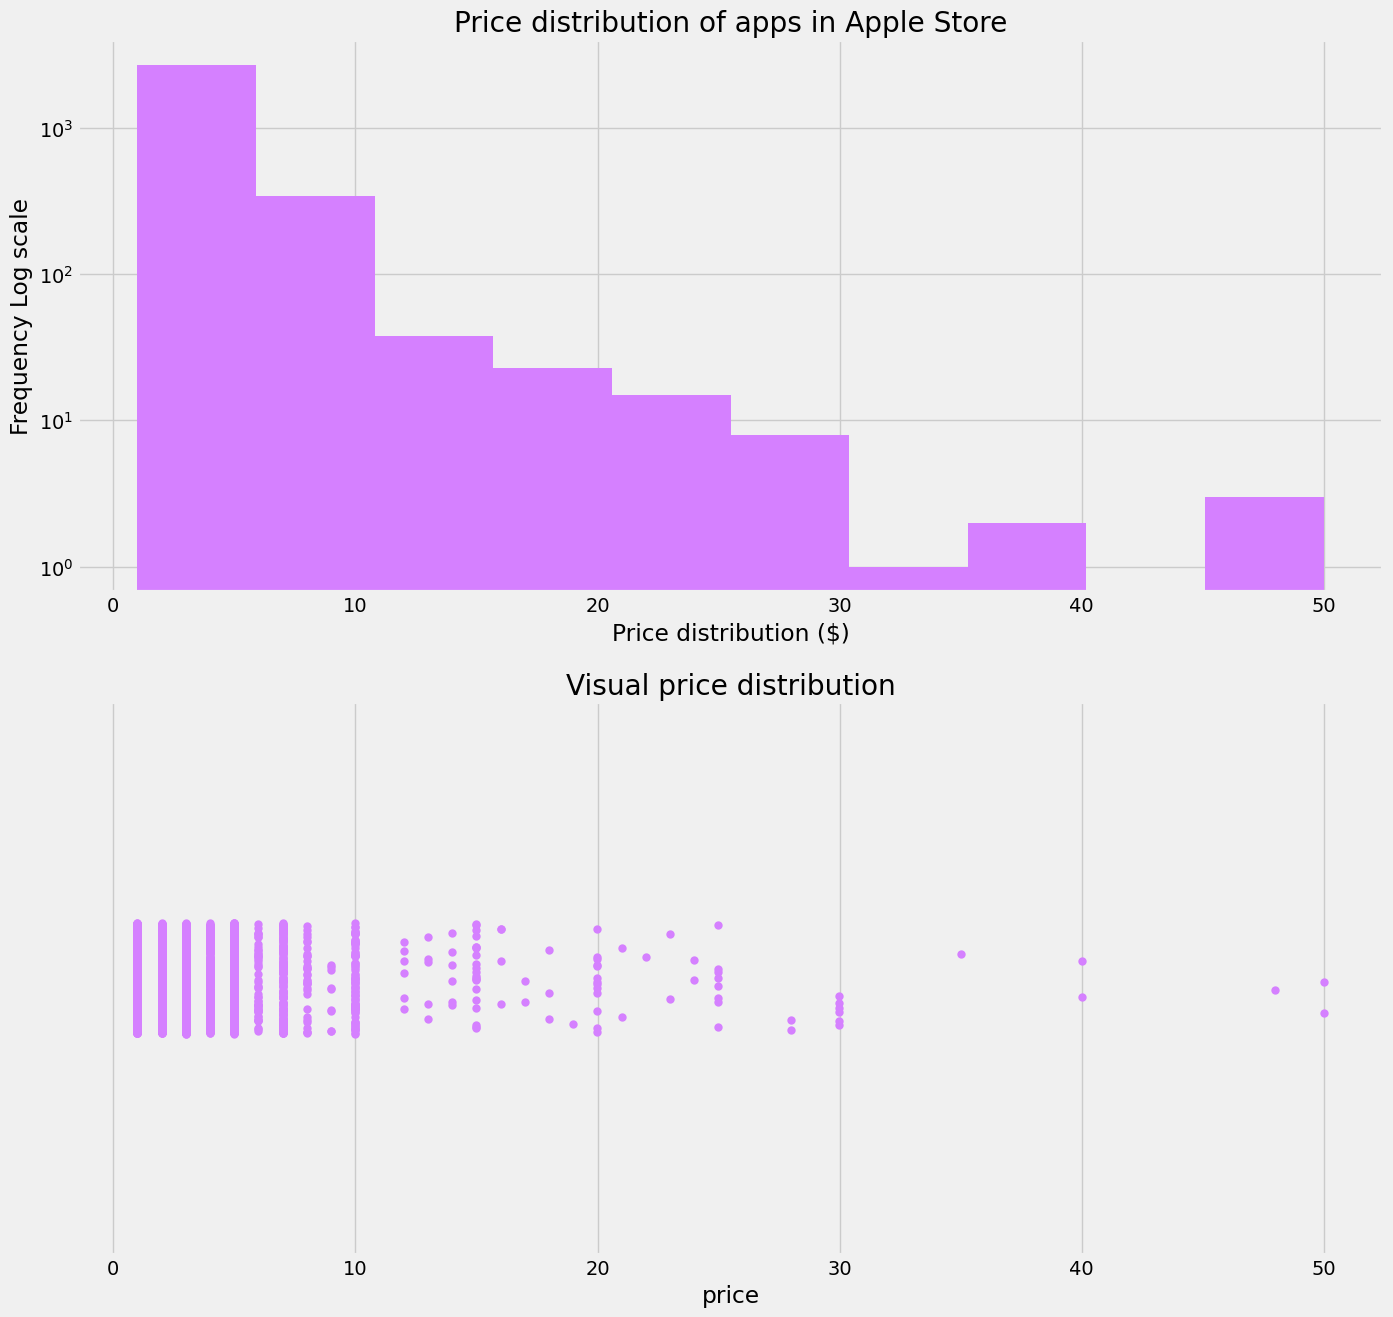

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(PaidApps['price'],log=True,bins=10,color='#d580ff')
plt.title('Price distribution of apps in Apple Store')
plt.ylabel('Frequency Log scale')
plt.xlabel('Price distribution ($)')

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=PaidApps,x='price',jitter=True,orient='h',size=6,color='#d580ff')

plt.savefig('Price distribution of apps')
plt.show()

In [9]:
print(f"INSIGHTS:\n(i)The minimum price of a paid app is {minPrice} while the maximum price is {maxPrice}. Moreover, majority of apps are priced between 0.99 — 10.0 $.\n(ii)Few apps have been priced above 30 $. Therefore, The price of an app should be kept below it.")

INSIGHTS:
(i)The minimum price of a paid app is 0.99 while the maximum price is 49.99. Moreover, majority of apps are priced between 0.99 — 10.0 $.
(ii)Few apps have been priced above 30 $. Therefore, The price of an app should be kept below it.


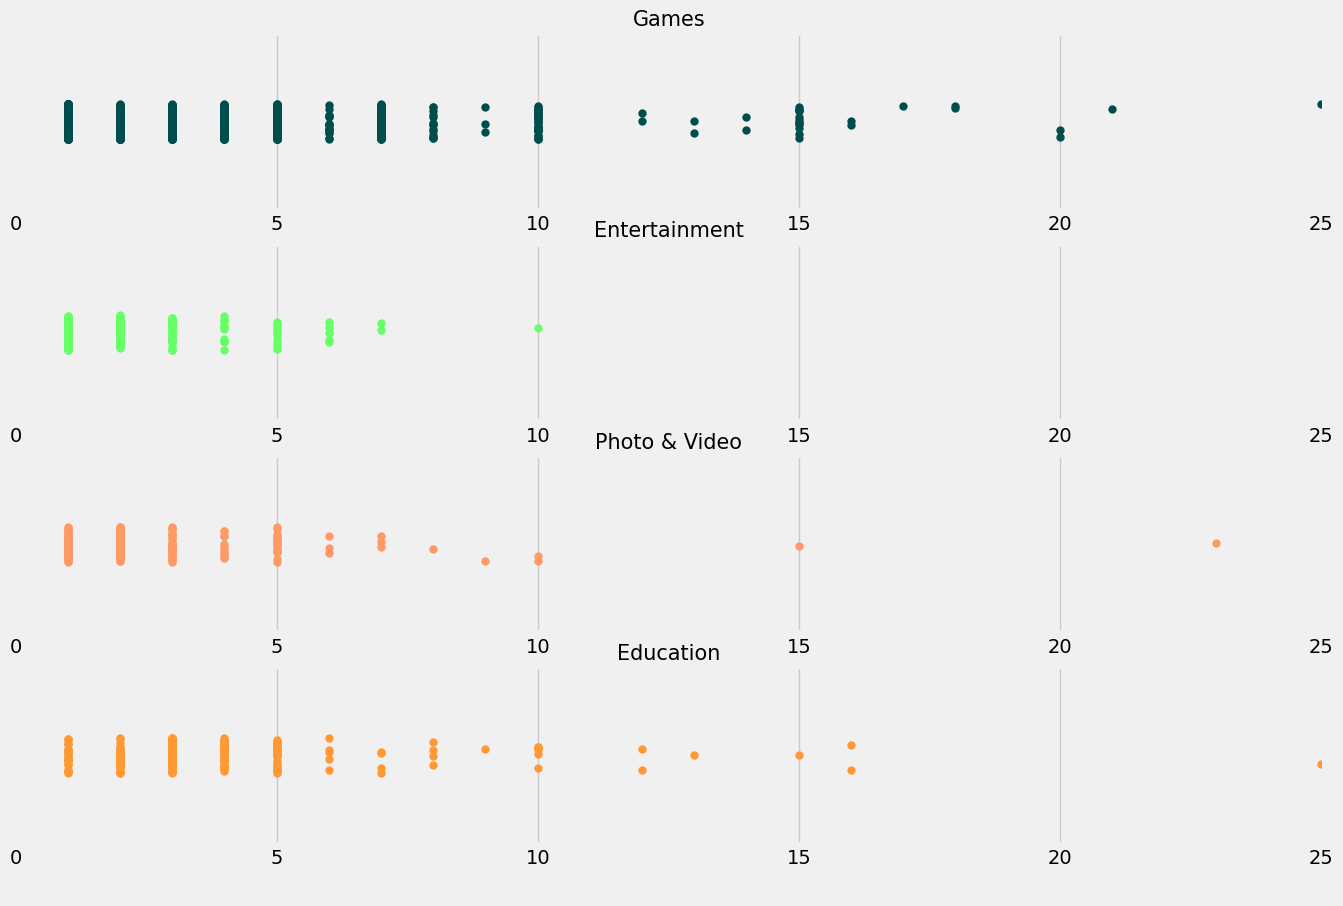

In [10]:
plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(0,25)
games=PaidApps[PaidApps["prime_genre"]=='Games']
sns.stripplot(data=games,x='price',jitter=True,orient='h',size=6,color='#004d4d')
plt.title('Games',fontsize=15)
plt.xlabel(' ')

plt.subplot(4,1,2)
plt.xlim(0,25)
entertainment=PaidApps[PaidApps["prime_genre"]=='Entertainment']
sns.stripplot(data=entertainment,x='price',jitter=True,orient='h',size=6,color='#66ff66')
plt.title('Entertainment',fontsize=15)
plt.xlabel(' ')

plt.subplot(4,1,3)
plt.xlim(0,25)
photovid=PaidApps[PaidApps["prime_genre"]=='Photo & Video']
sns.stripplot(data=photovid,x='price',jitter=True,orient='h',size=6,color='#ff9966')
plt.title('Photo & Video',fontsize=15)
plt.xlabel(' ')

plt.subplot(4,1,4)
plt.xlim(0,25)
ed=PaidApps[PaidApps["prime_genre"]=='Education']
sns.stripplot(data=ed,x='price',jitter=True,orient='h',size=6,color='#ff9933')
plt.title('Education',fontsize=15)
plt.xlabel(' ')

plt.savefig('Price distribution — Category wise')

In [11]:
print("INSIGHTS:\n(i)Entertainment apps have lower price range, usually ranging b/w 0.00—7.00 $.\n(ii)Gaming apps are highly priced with most of it priced till 20$.")

INSIGHTS:
(i)Entertainment apps have lower price range, usually ranging b/w 0.00—7.00 $.
(ii)Gaming apps are highly priced with most of it priced till 20$.


In [12]:
category_distribution = AppleS["prime_genre"].value_counts()
category_distribution

prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: count, dtype: int64

In [13]:
topCategories=category_distribution[:4]
topCategories

prime_genre
Games            3862
Entertainment     535
Education         453
Photo & Video     349
Name: count, dtype: int64

In [14]:
others_count = category_distribution[4:].sum()
others_count

1998

In [15]:
topCategories['Others'] = others_count
topCategories

prime_genre
Games            3862
Entertainment     535
Education         453
Photo & Video     349
Others           1998
Name: count, dtype: int64

In [16]:
free=AppleS[AppleS['price']==0]['prime_genre'].value_counts().sort_values(ascending=False)
free

prime_genre
Games                2257
Entertainment         334
Photo & Video         167
Social Networking     143
Education             132
Shopping              121
Utilities             109
Lifestyle              94
Finance                84
Sports                 79
Health & Fitness       76
Music                  67
Book                   66
Productivity           62
News                   58
Travel                 56
Food & Drink           43
Weather                31
Business               20
Navigation             20
Reference              20
Catalogs                9
Medical                 8
Name: count, dtype: int64

In [17]:
freeCat=free[:2]
freeCat['Education']=132
freeCat['Photo & Video']=167
otherfree= (free[5:].sum())+(143)
freeCat['Others']=otherfree
freeCat

prime_genre
Games            2257
Entertainment     334
Education         132
Photo & Video     167
Others           1166
Name: count, dtype: int64

In [18]:
paid=AppleS[AppleS['price']>0]['prime_genre'].value_counts().sort_values(ascending=False)
paid

prime_genre
Games                1605
Education             321
Entertainment         201
Photo & Video         182
Utilities             139
Productivity          116
Health & Fitness      104
Music                  71
Lifestyle              50
Book                   46
Reference              44
Weather                41
Business               37
Sports                 35
Navigation             26
Travel                 25
Social Networking      24
Finance                20
Food & Drink           20
News                   17
Medical                15
Shopping                1
Catalogs                1
Name: count, dtype: int64

In [19]:
paidCat=paid[:1]
paidCat['Entertainment']=201
paidCat['Education']=321
paidCat['Photo & Video']=182
otherpaid=paid[4:].sum()
paidCat['Others']=otherpaid
paidCat

prime_genre
Games            1605
Entertainment     201
Education         321
Photo & Video     182
Others            832
Name: count, dtype: int64

In [20]:
prime_genre=topCategories.index.tolist()
total_count=topCategories.values.tolist()
free_count=freeCat.values.tolist()
paid_count=paidCat.values.tolist()

data = {'prime_genre':prime_genre,'total_count':total_count,'free_count':free_count,'paid_count':paid_count}
dist = pd.DataFrame(data)
dist

,prime_genre,total_count,free_count,paid_count
0,Games,3862,2257,1605
1,Entertainment,535,334,201
2,Education,453,132,321
3,Photo & Video,349,167,182
4,Others,1998,1166,832


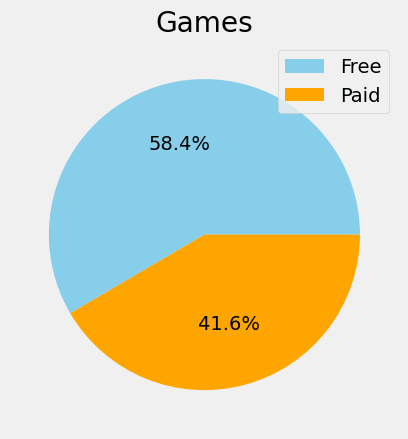

In [21]:
def drawCat(categ):
    category_data = dist[dist['prime_genre'] == categ].iloc[0]
    sizes = [category_data['free_count'], category_data['paid_count']] 
    labels = ['Free', 'Paid']
    plt.pie(sizes, autopct='%1.1f%%', colors=['skyblue', 'orange'])
    plt.title(f'{categ}')
    plt.legend(loc='upper right',labels=labels)
    
drawCat("Games")

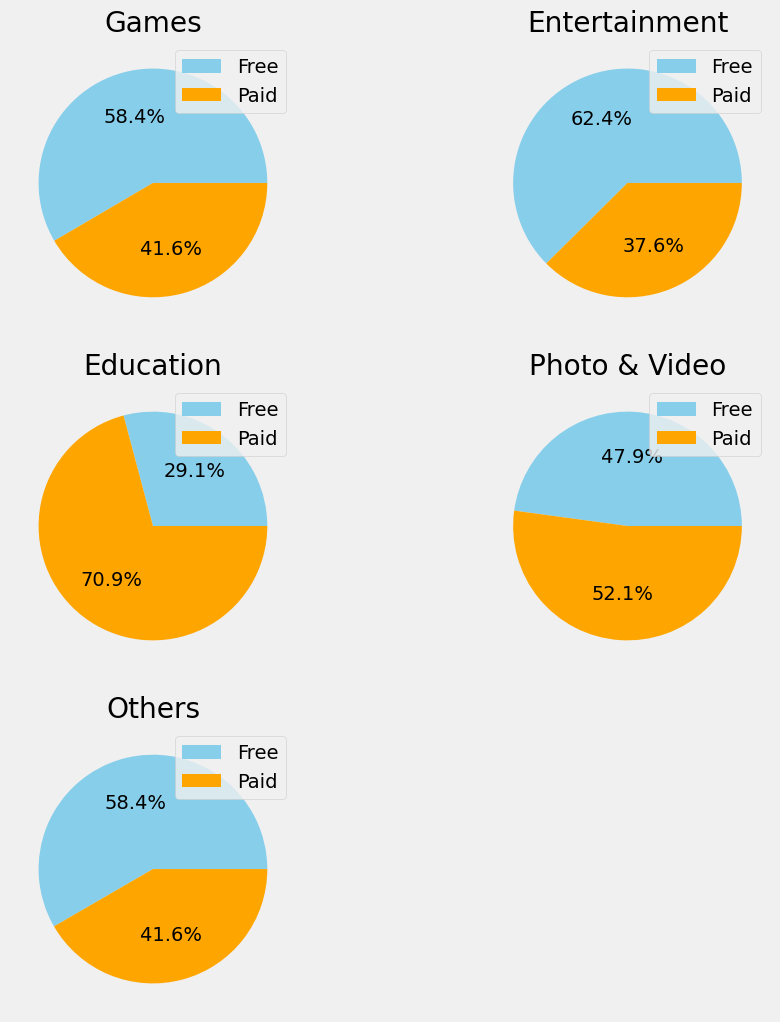

In [42]:
plt.figure(figsize=(10,12))
categories = topCategories.index
for i, category in zip(range(1, 6), categories):
    plt.subplot(3, 2, i)
    drawCat(category)

plt.savefig("c")

In [23]:
import numpy as np

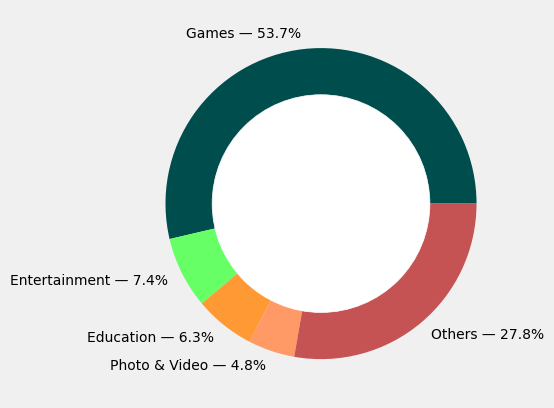

In [24]:
label_names = topCategories.index
size = total_count
size = np.array(size)
my_circle=plt.Circle((0,0),0.7,color='white')

l=[f'{label} — {percentage:.1%}' for label, percentage in zip(label_names, size / sum(size))]

plt.pie(size,labels=l,colors=['#004d4d','#66ff66','#ff9933','#ff9966','#c65353'],textprops={'fontsize': 10})
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [25]:
f=pd.DataFrame(index=np.arange(0,10,2),data=dist['free_count'].values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=dist['paid_count'].values,columns=['num'])
final=pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

[2257, 1605, 334, 201, 132, 321, 167, 182, 1166, 832]

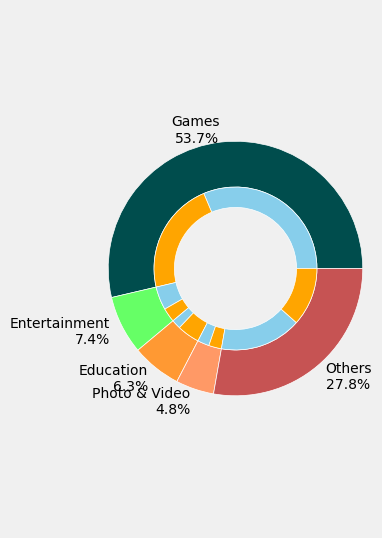

In [47]:
group_names = topCategories.index
group_size = total_count
subgroup_size = final.num.tolist()
group_size = np.array(group_size)

labels = [f'{label}\n{percentage:.1%}' for label, percentage in \
          zip(group_names, group_size / sum(group_size))]

fig, ax = plt.subplots(figsize=(4, 8))
ax.axis('equal')

mypie, _ = ax.pie(group_size, radius=2.5, labels=labels, \
    colors=['#004d4d', '#66ff66', '#ff9933', '#ff9966', '#c65353'], textprops={'fontsize': 10})
plt.setp(mypie, width=0.9, edgecolor='white')

mypie2, _ = ax.pie(subgroup_size, radius=1.6, colors=["skyblue", "orange"])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.subplots_adjust(top=0.3)
plt.tight_layout()

plt.savefig("c2")

plt.show()

In [27]:
def price(x):
    if x>0:
        return 'Paid'
    else:
        return 'Free'
    
AppleS['catprice']=AppleS['price'].apply(lambda x: price(x))
AppleS.tail()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,catprice
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1,Free
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1,Free
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1,Free
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,1.0.3,12+,Entertainment,40,0,1,1,Free
7196,977965019,みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~,51174400,USD,0.0,0,0,0.0,0.0,1.4.0,4+,Food & Drink,37,0,1,1,Free


In [28]:
top4=topCategories.index[:4]
def categ(x):
    if x in top4:
        return x
    else : 
        return "Others"

AppleS['generalized_genre']= AppleS.prime_genre.apply(lambda x : categ(x))

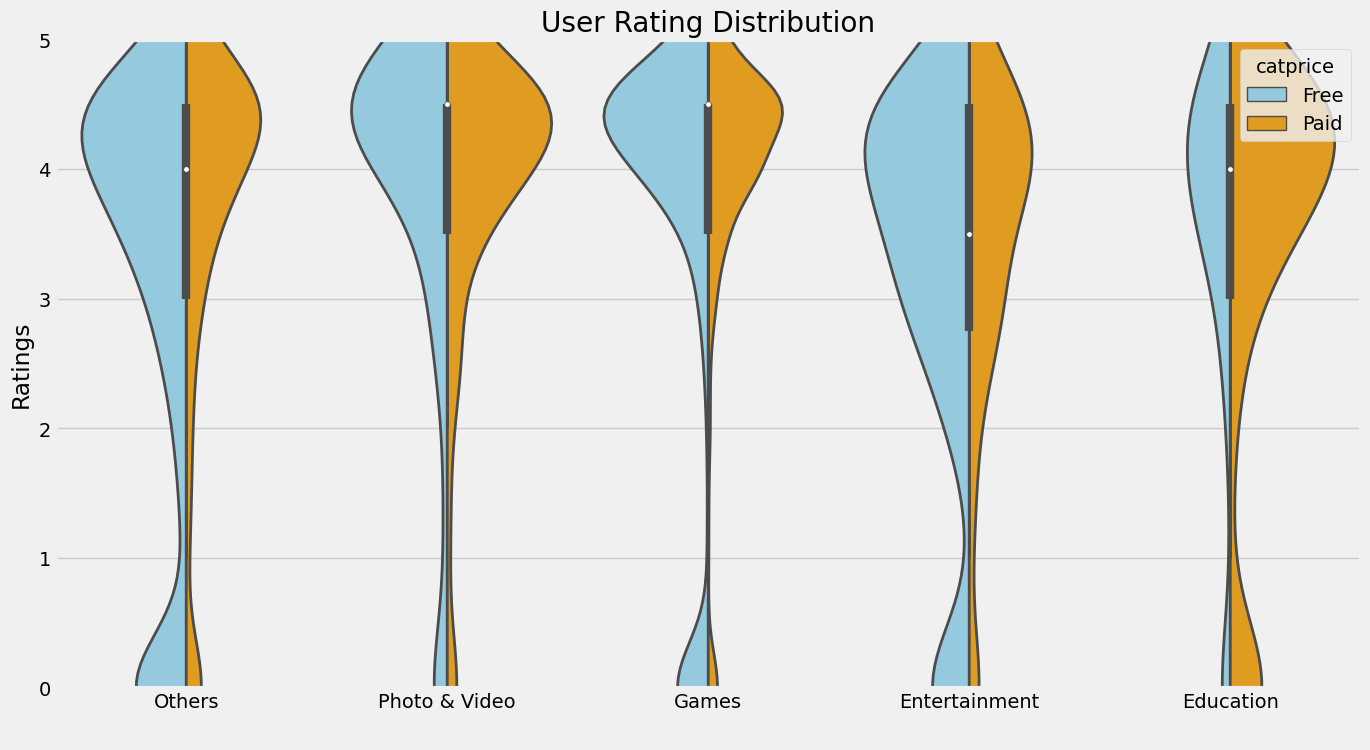

In [50]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("User Rating Distribution")
sns.violinplot(data=AppleS,y='user_rating',x='generalized_genre',hue='catprice',\
            vertical=True,Kde=False,split=True,linewidth=2,scale='count',palette=['skyblue','orange'])
plt.xlabel(" ")
plt.ylabel("Ratings")

plt.savefig("User Ratings")

plt.show()